In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import pandas as pd

In [5]:
df = pd.read_csv('/Users/minhphan/Desktop/Text Sentiment/Reviews And Ratings.csv')

In [6]:
df.head(10)

,Unnamed: 0,Rating,Lang,Type,Country,Date,Helpful,translated
0,72,5,it,Verified,Italy,11/1/2020,43.0,What to say? My daughter LOVES him and I with ...
1,85,5,it,Not Verified,Italy,9/10/2019,36.0,"I decided to test this plush to my grandson, j..."
2,107,5,it,Verified,Italy,8/12/2019,2.0,"An unusual pet, this otter is beautiful! Cute ..."
3,109,4,it,Verified,Italy,4/2/2021,1.0,"Beautiful, soft and very relaxing. It comes wi..."
4,113,4,it,Verified,Italy,21/02/2020,2.0,"Plush tender, my 16-month-old loves it, sleeps..."
5,115,5,it,Verified,Italy,12/11/2019,3.0,"I love it, simply. I bought it after seeing it..."
6,116,5,it,Verified,Italy,25/10/2019,5.0,"Beautiful product, the only problem and that t..."
7,125,5,it,Verified,Italy,7/8/2020,2.0,Perfect!! Relaxed very much my son of 4 months...
8,138,5,it,Verified,Italy,25/04/2020,NaN,The otter accompanies the dwarfs of my baby wi...
9,146,2,it,Verified,Italy,23/11/2020,NaN,"Functional carillon, my 4 month old girl falls..."


In [7]:
# WordCloud for dataset and removing stopwords like 'https'

import nltk
from nltk.corpus import stopwords
from spacy.lang.en.stop_words import STOP_WORDS
from wordcloud import WordCloud

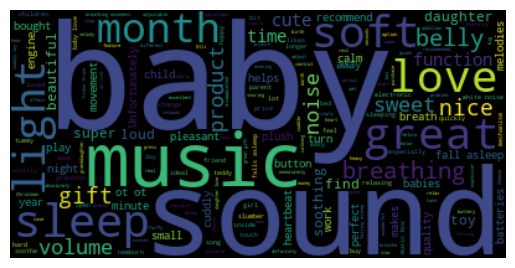

In [9]:
# Create stopword list:

STOP_WORDS.add('otter')
stopwords = set(list(STOP_WORDS) +list(stopwords.words()))
stopwords.update(["br", "href", 'https'])
stopwords.update(stopwords)
textt = " ".join(desc for desc in df.translated)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [8]:
# Remove rating that is zero

df = df[df['Rating'] != 0]
#Creating Positive & Negative sentiments as +1 and -1 according to rating
df['sentiment'] = df['Rating'].apply(lambda rating : +1 if rating >= 4 else -1)

In [8]:
# Create sentiment labels

positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/minhphan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

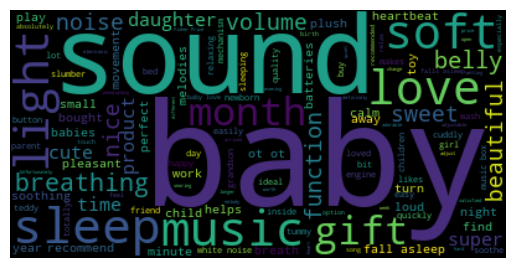

In [10]:
# Create WordCloud for positive samples

stopwords.update(["br", "href","good","great", 'https']) 
pos = " ".join(review for review in positive.translated)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
# Search positive words that contains the product name

for i in positive[positive['translated'].str.contains("otter")]['translated'].iloc[0:7]:
    print(i,'\n')

What to say? My daughter LOVES him and I with her. Very soft, zero visible seams, tender and especially functional. It reproduces according to the choice of music, white noise, the sound of the Breath or heartbeat. Also the otter tummy lights up and moves as if breathing. For the newborn is a real comfort in the cradle, always kept in safety, I place it away from his face so that he can perceive it even just by touching it with his hand. Wonderful purchase, we are really happy! 

I decided to test this plush to my grandson, just three years old. As soon as he saw it he was very happy and he exclaimed it was: "Zia, it's very soft!" Actually the plush is really soft to the touch and a real companion for the nights, of our children. The animal represented is a gray otter, a toy animal that is able to help children play and also relax, during the night and during the time they rest. This otter is able to emit vibrations that calm and relax the child, but also of music, very sweet. It is su

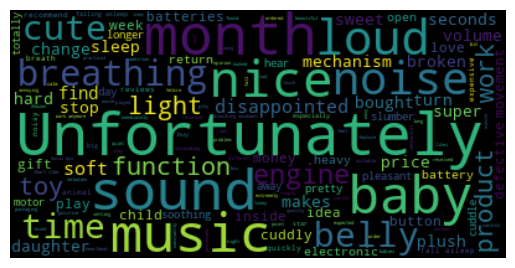

In [12]:
# Create WordCloud for negative samples

neg = " ".join(review for review in negative.translated)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

In [13]:
# Search negative words that contains the product name 

for i in negative[negative['translated'].str.contains("otter")]['translated'].iloc[0:7]:
    print(i,'\n')

The mechanism is a little noisy when “breathing” and if the tummy touches baby when the otter takes a breath, the gentle pressure it creates turns the otter off. But I love the sounds and the light, their is a volume control which is great. Overall I like it, just wish it wasnt as sensitive. 

Super cute toy and very soft. I like that you can choose all the setting to personalize the otter like the sounds, volume, light and so on. The only thing I dont love is when you have the belly function on it make sort of a robotic noise and if baby is holding it tightly it makes a clicking noise as it tries to move. Overall great toy but a little bit pricey for a musical stuffed animal. 

The controller inside of otter is too chunky and hard. I was expecting very soft snuggly toy for nighttime. my 1 1/2 old throw it out from crib all the time. She doesn’t like it.... :(  other than that, it works fine. 

The button to activate this is on the otter's tummy and very sensitive.  So, if my upset bab

In [14]:
#Distribution of sentiments amongst samples

df['sentimentt'] = df['sentiment'].replace({-1 : 'negative'})
df['sentimentt'] = df['sentimentt'].replace({1 : 'positive'})
fig = px.histogram(df, x="sentimentt")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

In [5]:
#Distribution of Score

import plotly.express as px
fig = px.histogram(df, x="Rating")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Stars Rating Score')
fig.show()